# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 2: Data Inspection, Cleaning and Wrangling in Python

Author: Mark Bauer

Table of Contents
=================

   Getting Started
          
   1. Importing Libraries 
   2. Reading in Data as a pandas Dataframe      
   3. Data Inspection
       * 3.1 Previewing Data
       * 3.2 Calculating Summary Statistics
       * 3.3 Identifying Null Values 
   4. Data Cleaning & Wrangling
       * 4.1 Previewing Column Values
       * 4.2 Exploring Distribution of Values
       * 4.3 Filtering Data
       * 4.4 Create New Columns
       * 4.5 Filling In or Dropping Null Values 
   5. Sample Analysis
       * 5.1. Line Plot of Year Built
       * 5.2. Identify Oldest Building in Dataset  
   6. Conclusion

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset
## Reading in data as CSV in static form

Screenshot of link address.
![building_footprints_csv](images/building-footprints-csv.png)

### Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

### Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
# printing verions of Python modules and packages with **watermark** 
# documention for installing watermark: https://github.com/rasbt/watermark

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
matplotlib: 3.5.2
seaborn   : 0.11.2



# 2. Reading in Data as a pandas Dataframe

In [3]:
# reading in our data as a pandas dataframe called building_df
path = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
building_df = pd.read_csv(path)

# preview the data
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


# 3. Data Inspection
## 3.1 Previewing Data

In [4]:
# previewing the first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [5]:
# previewing the last five rows
building_df.tail()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1083334,MULTIPOLYGON (((-74.08682441622348 40.60135199...,NaN,5122288,1986.0,01/22/2019 12:00:00 AM,Constructed,163197,37.0,2100,102.0,0,0,5031730001,5031730001,Other (Man,{E3B48615-0EB2-49F5-BF41-2F645806A8CD}
1083335,MULTIPOLYGON (((-73.75575727232598 40.74675271...,NaN,4451756,1980.0,01/22/2019 12:00:00 AM,Constructed,629565,27.0,2100,99.0,0,0,4076210001,4076210001,Other (Man,{0E86163E-D067-478E-9B7C-EEC0C8ED2B90}
1083336,MULTIPOLYGON (((-74.08707606059374 40.60209008...,NaN,5124447,1986.0,01/22/2019 12:00:00 AM,Constructed,465659,34.0,2100,99.0,0,0,5031730001,5031730001,Other (Man,{FC176DBE-B51F-41B9-9083-69A33C9F4EF4}
1083337,MULTIPOLYGON (((-74.08614258211917 40.60158827...,NaN,5122285,1986.0,01/22/2019 12:00:00 AM,Constructed,184167,34.0,2100,104.0,0,0,5031730001,5031730001,Other (Man,{C6C6FD61-09FE-4829-B5CC-639DEF2EACFA}
1083338,MULTIPOLYGON (((-74.08712823809763 40.60145338...,NaN,5122294,1986.0,01/22/2019 12:00:00 AM,Constructed,541298,37.0,2100,102.0,0,0,5031730001,5031730001,Other (Man,{0CBE0C68-0174-447E-BDDB-3DDAC079AFD2}


In [6]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_df.shape

(1083339, 16)

In [7]:
# more readable
rows, columns = building_df.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,083,339 rows and 16 columns.


In [8]:
# the object's type
type(building_df)

pandas.core.frame.DataFrame

In [9]:
# printing the object's type of a column
type(building_df['CNSTRCT_YR'])

pandas.core.series.Series

In [10]:
# notice the difference of type from series to dataframe
print(type(building_df["CNSTRCT_YR"]))
print(type(building_df[["CNSTRCT_YR"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
# printing the columns
building_df.columns

Index(['the_geom', 'NAME', 'BIN', 'CNSTRCT_YR', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE', 'GLOBALID'],
      dtype='object')

In [12]:
# printing the data types of our columns
building_df.dtypes

the_geom       object
NAME           object
BIN             int64
CNSTRCT_YR    float64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE       int64
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
GLOBALID       object
dtype: object

In [13]:
# printing the names, non-null counts and datatypes of columns
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083339 entries, 0 to 1083338
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1083339 non-null  object 
 1   NAME        2254 non-null     object 
 2   BIN         1083339 non-null  int64  
 3   CNSTRCT_YR  1072979 non-null  float64
 4   LSTMODDATE  1083339 non-null  object 
 5   LSTSTATYPE  1083016 non-null  object 
 6   DOITT_ID    1083339 non-null  int64  
 7   HEIGHTROOF  1080692 non-null  float64
 8   FEAT_CODE   1083339 non-null  int64  
 9   GROUNDELEV  1082774 non-null  float64
 10  SHAPE_AREA  1083339 non-null  int64  
 11  SHAPE_LEN   1083339 non-null  int64  
 12  BASE_BBL    1083339 non-null  int64  
 13  MPLUTO_BBL  1083339 non-null  int64  
 14  GEOMSOURCE  1083020 non-null  object 
 15  GLOBALID    1083339 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 132.2+ MB


In [14]:
# printing RangeIndex
building_df.index

RangeIndex(start=0, stop=1083339, step=1)

In [15]:
# printing True/False if column is unique on our unique key (DOITT_ID)
building_df['DOITT_ID'].is_unique

True

## 3.2 Calculating Summary Statistics

In [16]:
# printing descriptive statistics of our numeric columns
building_df.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.083339e+06,1.072979e+06,1.083339e+06,1.080692e+06,1.083339e+06,1.082774e+06,1083339.0,1083339.0,1.083339e+06,1.083339e+06
mean,3.712969e+06,1.939625e+03,5.948676e+05,2.769602e+01,2.693431e+03,5.512108e+01,0.0,0.0,3.564176e+09,3.564176e+09
std,1.026636e+06,2.946430e+01,3.622085e+05,2.176692e+01,1.198552e+03,4.154839e+01,0.0,0.0,9.858382e+08,9.858381e+08
min,1.000000e+06,1.652000e+03,1.000000e+00,0.000000e+00,1.000000e+03,-1.600000e+01,0.0,0.0,1.000010e+09,1.000010e+09
25%,3.129696e+06,1.920000e+03,2.880725e+05,1.852000e+01,2.100000e+03,2.500000e+01,0.0,0.0,3.043390e+09,3.043390e+09
50%,4.067896e+06,1.930000e+03,5.763490e+05,2.612391e+01,2.100000e+03,4.600000e+01,0.0,0.0,4.019560e+09,4.019560e+09
75%,4.483422e+06,1.955000e+03,8.664475e+05,3.113258e+01,2.100000e+03,7.400000e+01,0.0,0.0,4.107010e+09,4.107010e+09
max,5.799523e+06,2.024000e+03,1.301934e+06,1.550000e+03,5.110000e+03,1.335000e+03,0.0,0.0,6.000000e+09,6.000000e+09


In [17]:
# printing descriptive statistics of our non-numeric columns
building_df.describe(include=['O'])

,the_geom,NAME,LSTMODDATE,LSTSTATYPE,GEOMSOURCE,GLOBALID
count,1083339,2254,1083339,1083016,1083020,1083339
unique,1083339,1896,1786,13,3,1083339
top,MULTIPOLYGON (((-73.96664570466969 40.62599676...,Adler Place Town Houses,08/22/2017 12:00:00 AM,Constructed,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
freq,1,52,800491,1080548,1011995,1


In [18]:
# returning the mode of CNSTRCT_YR and NAME
(building_df
 .loc[:, ['CNSTRCT_YR', 'NAME']]
 .mode()
 .rename(index={0: "mode"})
)

,CNSTRCT_YR,NAME
mode,1920.0,Adler Place Town Houses


In [19]:
# value counts of the CNSTRCT_YR column - top 10
(building_df['CNSTRCT_YR']
 .value_counts()
 .head(10)
)

1920.0    130095
1930.0    112505
1925.0    109005
1950.0     62632
1910.0     52231
1940.0     51211
1960.0     40736
1935.0     38527
1931.0     36674
1945.0     34026
Name: CNSTRCT_YR, dtype: int64

In [20]:
# value counts of the NAME column - top 20
(building_df['NAME']
 .value_counts()
 .head(20)
)

Adler Place Town Houses              52
Cooper Place Town Houses             38
Broun Place Town Houses              36
Debs Place Town Houses               34
Defoe Place Town Houses              26
Asch Loop Town Houses                18
Earhart Lane Town Houses             16
NO NAME                               9
Restrooms                             8
Kimball Block                         6
10                                    5
20                                    5
Educational Park                      5
5                                     4
Park Maintenance                      4
11                                    4
Thomas Greene Playground-Building     4
4                                     4
27                                    4
22                                    4
Name: NAME, dtype: int64

In [21]:
# group by 'LSTSTATYPE', count of rows
(building_df
 .groupby(by='LSTSTATYPE')['DOITT_ID']
 .count()
)

LSTSTATYPE
Alteration                     1448
Constructed                 1080548
Correction                       65
Demolition                       12
Geometry                         17
Initialization                   99
Investigate Construction         51
Investigate Demolition            4
Marked for Construction         262
Marked for Demolition            82
Marked for construction           9
Merged                           89
Split                           330
Name: DOITT_ID, dtype: int64

In [22]:
# group by 'FEAT_CODE', mean value of 'HEIGHTROOF' and 'GROUNDELEV'
(building_df
 .groupby(by='FEAT_CODE')[['HEIGHTROOF', 'GROUNDELEV']]
 .mean()
 .rename(columns={'HEIGHTROOF':'HEIGHTROOF_avg', 'GROUNDELEV':'GROUNDELEV_avg'})
)

,HEIGHTROOF_avg,GROUNDELEV_avg
FEAT_CODE,,
1000,14.853740,39.965517
1001,18.060071,55.975000
1003,70.687500,49.506849
1004,16.954956,32.504425
1005,13.004551,30.047619
1006,367.722222,38.333333
2100,31.616523,55.101115
2110,54.010564,37.771930
5100,101.850723,49.872093


In [23]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
)

count
LSTSTATYPE               FEAT_CODE        
Alteration               1004            3
                         2100         1384
                         5100            2
                         5110           59
Constructed              1000           86
                         1001          122
                         1003            5
                         1004          223
                         1005           22
                         1006           16
                         2100       866448
                         2110          122
                         5100           67
                         5110       213437
Correction               2100           46
                         5100            1
                         5110           18
Demolition               2100            9
                         5110            3
Geometry                 1000           11
                         2100            6
Initialization           1003            7
                         1004            1
                         1006            1
                         2100           45
                         5100           41
                         5110            4
Investigate Construction 2100           35
                         5100           13
                         5110            3
Investigate Demolition   2100            4
Marked for Construction  1001            1
                         1003           72
                         1004            1
                         1006            1
                         2100          102
                         5100           50
                         5110           35
Marked for Demolition    1003            1
                         2100           73
                         5110            8
Marked for construction  2100            9
Merged                   2100           88
                         5110            1
Split                    1000            1
                         1004            2
                         2100          322
                         5110            5

In [24]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows and explode the indexes
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
 .reset_index()
)

,LSTSTATYPE,FEAT_CODE,count
0,Alteration,1004,3
1,Alteration,2100,1384
2,Alteration,5100,2
3,Alteration,5110,59
4,Constructed,1000,86
5,Constructed,1001,122
6,Constructed,1003,5
7,Constructed,1004,223
8,Constructed,1005,22
9,Constructed,1006,16


In [25]:
# compute pairwise correlation of columns, excluding null values
building_df.corr()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
BIN,1.000000,0.290923,0.156302,-0.357457,0.190890,0.086990,NaN,NaN,0.988683,0.988683
CNSTRCT_YR,0.290923,1.000000,0.203663,0.025494,-0.132555,-0.002949,NaN,NaN,0.284796,0.284796
DOITT_ID,0.156302,0.203663,1.000000,-0.160125,0.539630,-0.016994,NaN,NaN,0.075930,0.075930
HEIGHTROOF,-0.357457,0.025494,-0.160125,1.000000,-0.363273,-0.002519,NaN,NaN,-0.328030,-0.328030
FEAT_CODE,0.190890,-0.132555,0.539630,-0.363273,1.000000,0.001654,NaN,NaN,0.090356,0.090356
GROUNDELEV,0.086990,-0.002949,-0.016994,-0.002519,0.001654,1.000000,NaN,NaN,0.106115,0.106115
SHAPE_AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHAPE_LEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASE_BBL,0.988683,0.284796,0.075930,-0.328030,0.090356,0.106115,NaN,NaN,1.000000,1.000000
MPLUTO_BBL,0.988683,0.284796,0.075930,-0.328030,0.090356,0.106115,NaN,NaN,1.000000,1.000000


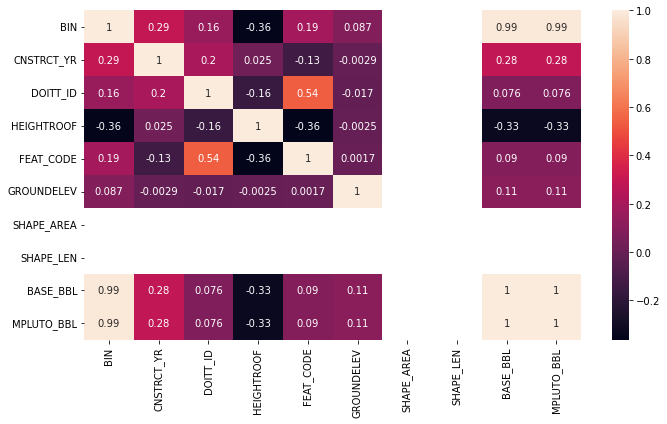

In [26]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
    building_df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

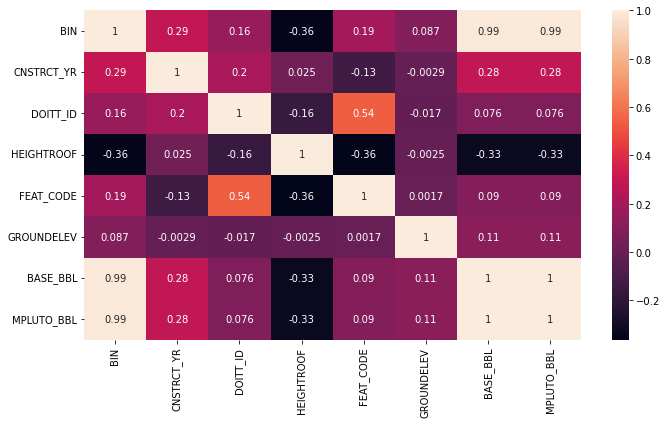

In [27]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 6))

# dropping columns of all nulls
corr_df = building_df.drop(columns=['SHAPE_AREA', 'SHAPE_LEN'])

sns.heatmap(
    corr_df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## 3.3 Identifying Null Values

In [28]:
# total nulls in dataframe
null_count = (
    building_df
    .isnull()
    .sum()
    .sum()
)

print('total nulls in dataframe: {:,}'.format(null_count))

total nulls in dataframe: 1,095,299


In [29]:
# total non-nulls in dataframe
nonnull_count = (
    building_df
    .notnull()
    .sum()
    .sum()
)

print('total non-nulls in dataframe: {:,}'.format(nonnull_count))

total non-nulls in dataframe: 16,238,125


In [30]:
# nulls per column sorted descending
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

NAME          1081085
CNSTRCT_YR      10360
HEIGHTROOF       2647
GROUNDELEV        565
LSTSTATYPE        323
GEOMSOURCE        319
the_geom            0
BIN                 0
LSTMODDATE          0
DOITT_ID            0
FEAT_CODE           0
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL          0
GLOBALID            0
dtype: int64

In [31]:
# calculating a percentage of the number of nulls to total number of records of each column
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
 .div(building_df.shape[0])
 .mul(100)
)

NAME          99.791940
CNSTRCT_YR     0.956303
HEIGHTROOF     0.244337
GROUNDELEV     0.052154
LSTSTATYPE     0.029815
GEOMSOURCE     0.029446
the_geom       0.000000
BIN            0.000000
LSTMODDATE     0.000000
DOITT_ID       0.000000
FEAT_CODE      0.000000
SHAPE_AREA     0.000000
SHAPE_LEN      0.000000
BASE_BBL       0.000000
MPLUTO_BBL     0.000000
GLOBALID       0.000000
dtype: float64

In [32]:
# % null as a dataframe
missing_data = (building_df.isnull().sum() / building_df.shape[0]) * 100

# creating a dataframe
missing_df = pd.DataFrame(
    missing_data, columns=['perc_missing']
)

missing_df.sort_values(by='perc_missing', ascending=False)

,perc_missing
NAME,99.791940
CNSTRCT_YR,0.956303
HEIGHTROOF,0.244337
GROUNDELEV,0.052154
LSTSTATYPE,0.029815
GEOMSOURCE,0.029446
the_geom,0.000000
BIN,0.000000
LSTMODDATE,0.000000
DOITT_ID,0.000000


In [33]:
# return a boolean same-sized object of nulls
building_df.isnull()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083334,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083335,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083336,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083337,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
# return a boolean if any of the values are null in column
(building_df
 .isnull()
 .any()
)

the_geom      False
NAME           True
BIN           False
CNSTRCT_YR     True
LSTMODDATE    False
LSTSTATYPE     True
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE     False
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL      False
MPLUTO_BBL    False
GEOMSOURCE     True
GLOBALID      False
dtype: bool

In [35]:
# return a boolean same-sized object of nulls in NAME column
building_df['NAME'].notnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1083334    False
1083335    False
1083336    False
1083337    False
1083338    False
Name: NAME, Length: 1083339, dtype: bool

In [36]:
# returning rows with non-null values in NAME column
building_df.loc[building_df['NAME'].notnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
3578,MULTIPOLYGON (((-73.95317216502298 40.75924424...,Roosevelt Isld Subway Station,1089270,1975.0,03/25/2008 12:00:00 AM,Constructed,996736,28.470000,2100,16.0,0,0,1013730001,1013730001,Photogramm,{E49130B9-6088-4BB5-9BA5-ABA8BFC69BA7}
4310,MULTIPOLYGON (((-73.88526375915657 40.86258229...,Alpha House,2102033,1922.0,08/17/2017 12:00:00 AM,Constructed,194515,22.560000,5110,98.0,0,0,2032730001,2032730001,Photogramm,{8A21945E-76A9-47A7-9355-2D500A91A949}
5793,MULTIPOLYGON (((-73.88149603905721 40.84855265...,Pheasant Aviary,2123889,1905.0,07/17/2014 12:00:00 AM,Constructed,925752,22.075648,2100,70.0,0,0,2031200020,2031200020,Photogramm,{2BCDE23D-4DD7-4642-8FC1-B347EDE772CA}
7987,MULTIPOLYGON (((-73.8312596282937 40.871147879...,Asch Loop Town Houses,2128807,1969.0,08/22/2017 12:00:00 AM,Constructed,197782,26.450000,2100,18.0,0,0,2051410120,2051410120,Photogramm,{E7006798-10CF-49AA-BE4E-A1039405D38A}
8142,MULTIPOLYGON (((-73.90110014758918 40.73308422...,NO NAME,4597316,1940.0,08/17/2017 12:00:00 AM,Constructed,786648,11.000000,5110,68.0,0,0,4023750180,4023750180,Other (Man,{E2CADF8E-D955-4BD4-AEED-0EFC3A2149C4}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081737,MULTIPOLYGON (((-73.87891131955934 40.84886042...,Butterfly Garden,2130397,1905.0,03/07/2024 12:00:00 AM,Constructed,1067056,20.000000,2100,83.0,0,0,2031200020,2031200020,Other (Man,{C9381E72-DE9A-416F-BE57-F3ACAD8F4255}
1081781,MULTIPOLYGON (((-73.99870373163134 40.76079134...,SILVER TOWERS SOUTH,1085962,2005.0,03/12/2024 12:00:00 AM,Merged,1114380,673.000000,2100,-6.0,0,0,1010890003,1010897502,Other (Man,{6377C3D4-4110-45EA-B1D7-9F900EBA6B7F}
1081782,MULTIPOLYGON (((-73.99903732069352 40.76046928...,SILVER TOWERS NORTH,1087678,2005.0,03/12/2024 12:00:00 AM,Constructed,1106099,143.000000,2100,-5.0,0,0,1010890003,1010897502,Other (Man,{E9EC4B62-D228-4ADF-81EC-7751E49C3131}
1081930,MULTIPOLYGON (((-74.07583742701601 40.58282253...,Ocean Breeze Track & Field Athletic Complex,5164735,2014.0,02/28/2024 12:00:00 AM,Constructed,1262394,89.000000,2100,10.0,0,0,5033550005,5033550005,Other (Man,{92AA89D1-876C-4DF0-886C-B8E6A036F293}


In [37]:
# returning rows with null values in NAME column
building_df.loc[building_df['NAME'].isnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083334,MULTIPOLYGON (((-74.08682441622348 40.60135199...,NaN,5122288,1986.0,01/22/2019 12:00:00 AM,Constructed,163197,37.000000,2100,102.0,0,0,5031730001,5031730001,Other (Man,{E3B48615-0EB2-49F5-BF41-2F645806A8CD}
1083335,MULTIPOLYGON (((-73.75575727232598 40.74675271...,NaN,4451756,1980.0,01/22/2019 12:00:00 AM,Constructed,629565,27.000000,2100,99.0,0,0,4076210001,4076210001,Other (Man,{0E86163E-D067-478E-9B7C-EEC0C8ED2B90}
1083336,MULTIPOLYGON (((-74.08707606059374 40.60209008...,NaN,5124447,1986.0,01/22/2019 12:00:00 AM,Constructed,465659,34.000000,2100,99.0,0,0,5031730001,5031730001,Other (Man,{FC176DBE-B51F-41B9-9083-69A33C9F4EF4}
1083337,MULTIPOLYGON (((-74.08614258211917 40.60158827...,NaN,5122285,1986.0,01/22/2019 12:00:00 AM,Constructed,184167,34.000000,2100,104.0,0,0,5031730001,5031730001,Other (Man,{C6C6FD61-09FE-4829-B5CC-639DEF2EACFA}


# 4. Data Cleaning & Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## 4.1 Previewing Column Values

In [38]:
# returning a series of the 'CNSTRCT_YR' column
building_df["CNSTRCT_YR"]

0          1925.0
1          1965.0
2          1970.0
3          1928.0
4          1950.0
            ...  
1083334    1986.0
1083335    1980.0
1083336    1986.0
1083337    1986.0
1083338    1986.0
Name: CNSTRCT_YR, Length: 1083339, dtype: float64

In [39]:
# returning a dataframe of the 'CNSTRCT_YR' column double brackets with .loc method
building_df.loc[:, ["CNSTRCT_YR"]]

,CNSTRCT_YR
0,1925.0
1,1965.0
2,1970.0
3,1928.0
4,1950.0
...,...
1083334,1986.0
1083335,1980.0
1083336,1986.0
1083337,1986.0


In [40]:
# first five rows sorted by the 'CNSTRCT_YR' column in ascending order
building_df.sort_values('CNSTRCT_YR').head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
956233,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.540000,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
431212,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,4610542,1661.0,08/17/2017 12:00:00 AM,Constructed,1190137,14.846959,5110,63.0,0,0,4050130006,4050130006,Photogramm,{36678A28-E8EE-45E8-BAA2-9A3F5118E176}
710890,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.120000,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
52886,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.640000,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
521973,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.260000,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}


In [41]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
building_df.sort_values('CNSTRCT_YR', ascending=False).head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1081978,MULTIPOLYGON (((-74.15420915924403 40.63292348...,NaN,5176374,2024.0,03/07/2024 12:00:00 AM,Constructed,1301585,32.0,2100,39.0,0,0,5011920060,5011920060,Other (Man,{3473E20A-E2C2-4AB2-9794-57D260153F26}
1082316,MULTIPOLYGON (((-73.88283687868734 40.83586288...,NaN,2129729,2024.0,03/21/2024 12:00:00 AM,Constructed,1301647,61.0,5100,16.0,0,0,2030150097,2030150097,Other (Man,{A795DF7A-DAD0-4EAB-BADA-4E84374E6984}
1082301,MULTIPOLYGON (((-73.9842217154888 40.641315363...,NaN,3418384,2024.0,04/01/2024 12:00:00 AM,Constructed,1301776,135.0,2100,58.0,0,0,3053010020,3053010020,Other (Man,{CA9B48A7-3478-42C4-A3AA-206B9F7A4D07}
1081563,MULTIPOLYGON (((-73.81851970780033 40.78045894...,NaN,4620938,2024.0,03/04/2024 12:00:00 AM,Constructed,1301523,25.0,5100,66.0,0,0,4046550010,4046550010,Other (Man,{1BA94494-99A1-485A-9972-C33DC20AAA83}
1082288,MULTIPOLYGON (((-73.80405713635685 40.78321096...,NaN,4623684,2024.0,03/29/2024 12:00:00 AM,Constructed,1301748,30.0,2100,61.0,0,0,4047460030,4047460030,Other (Man,{03822FDF-445A-4C84-9936-32F7D8DF0E0D}


In [42]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
(building_df
 .sort_values('CNSTRCT_YR', ascending=False)
 .loc[:, ['CNSTRCT_YR']]
 .head()
)

,CNSTRCT_YR
1081978,2024.0
1082316,2024.0
1082301,2024.0
1081563,2024.0
1082288,2024.0


In [43]:
# descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

building_df['CNSTRCT_YR'].describe()

count    1.072979e+06
mean     1.939625e+03
std      2.946430e+01
min      1.652000e+03
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.024000e+03
Name: CNSTRCT_YR, dtype: float64

## 4.2 Exploring Distribution of Values

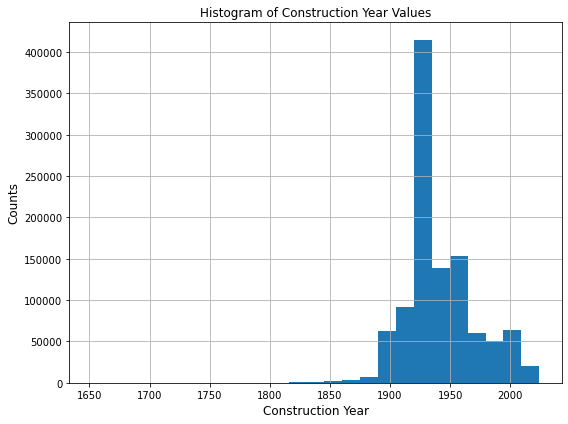

In [44]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
fig, ax = plt.subplots(figsize=(8, 6))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=25
)

# adding labels
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12) 
plt.title('Histogram of Construction Year Values', fontsize=12) 

plt.tight_layout()

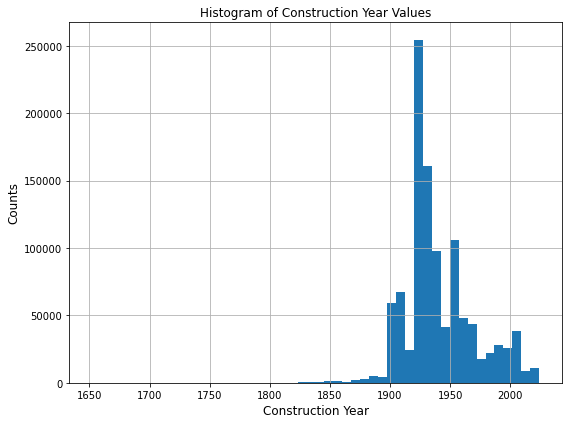

In [45]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
fig, ax = plt.subplots(figsize=(8, 6))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=50
)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Construction Year Values', fontsize=12)

plt.tight_layout()

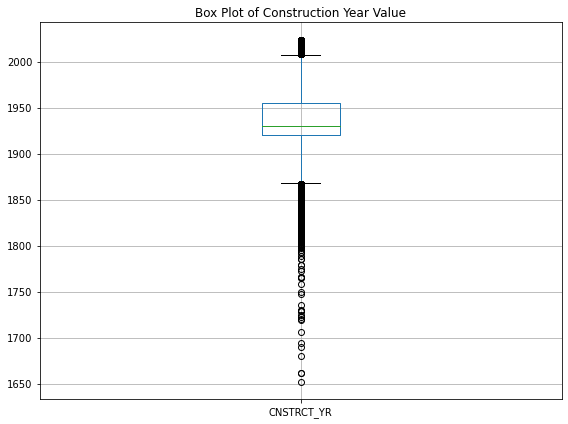

In [46]:
# making a box plot from our 'CNSTRCT_YR' column
fig, ax = plt.subplots(figsize=(8, 6))

building_df.boxplot(
    column=['CNSTRCT_YR'], 
    ax=ax
)

plt.title('Box Plot of Construction Year Value', fontsize=12)

plt.tight_layout()

## 4.3 Filtering Data

In [47]:
# df.iloc: Purely integer-location based indexing for selection by position.

# first row, first column
building_df.iloc[0, 0]

'MULTIPOLYGON (((-73.96664570466969 40.62599676998366, -73.96684846176461 40.625977490862574, -73.96685938726297 40.62604419372411, -73.96661621040211 40.62606731716107, -73.96660638332114 40.626007324369795, -73.96664680403327 40.626003480977275, -73.96664570466969 40.62599676998366)))'

In [48]:
# first row, start at second column return all columns
building_df.iloc[0, 1:]

NAME                                             NaN
BIN                                          3170958
CNSTRCT_YR                                    1925.0
LSTMODDATE                    08/22/2017 12:00:00 AM
LSTSTATYPE                               Constructed
DOITT_ID                                       96807
HEIGHTROOF                                 29.749853
FEAT_CODE                                       2100
GROUNDELEV                                      40.0
SHAPE_AREA                                         0
SHAPE_LEN                                          0
BASE_BBL                                  3065220021
MPLUTO_BBL                                3065220021
GEOMSOURCE                                Photogramm
GLOBALID      {31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
Name: 0, dtype: object

In [49]:
# first row, start at second column up to the last
building_df.iloc[0, 1:-1]

NAME                             NaN
BIN                          3170958
CNSTRCT_YR                    1925.0
LSTMODDATE    08/22/2017 12:00:00 AM
LSTSTATYPE               Constructed
DOITT_ID                       96807
HEIGHTROOF                 29.749853
FEAT_CODE                       2100
GROUNDELEV                      40.0
SHAPE_AREA                         0
SHAPE_LEN                          0
BASE_BBL                  3065220021
MPLUTO_BBL                3065220021
GEOMSOURCE                Photogramm
Name: 0, dtype: object

In [50]:
# specify row and column positions
building_df.iloc[[0, 5, 10], [0, 2, 5, 8]]

,the_geom,BIN,LSTSTATYPE,FEAT_CODE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,3170958,Constructed,2100
5,MULTIPOLYGON (((-74.14644228489016 40.58885592...,5122427,Constructed,2100
10,MULTIPOLYGON (((-74.1344861688728 40.600563532...,5034441,Constructed,2100


In [51]:
# df.loc: Access a group of rows and columns by label(s) or a boolean array.

# locate rows where construction year > 2000
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [52]:
# locate construction year > 2000, columns 'BIN', 'CNSTRCT_YR'
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000, ['BIN', 'CNSTRCT_YR']]
 .head()
)

,BIN,CNSTRCT_YR
6,5133580,2001.0
50,3394646,2009.0
80,3072927,2003.0
98,3390096,2004.0
224,4555084,2004.0


In [53]:
# locate construction year greater than 2000 but less than 2020
(building_df
 .loc[(building_df['CNSTRCT_YR'] > 2000)
      & (building_df['CNSTRCT_YR'] < 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [54]:
# locate construction year between 2000 and 2020 inclusive
(building_df
 .loc[building_df['CNSTRCT_YR'].between(2000, 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.040000,2100,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}


In [55]:
# locate construction year value is in list
years = [2000, 2020]

(building_df
 .loc[building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.04,2100,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
195,MULTIPOLYGON (((-74.13556237981483 40.64013483...,NaN,5132682,2000.0,08/22/2017 12:00:00 AM,Constructed,926272,29.08,2100,28.0,0,0,5010750122,5010750122,Photogramm,{6E88B8D1-E1FC-4421-BC53-42D3C4BCFE52}
451,MULTIPOLYGON (((-73.87150759130621 40.75533109...,NaN,4538129,2000.0,12/07/2018 12:00:00 AM,Constructed,1108486,38.00,2100,78.0,0,0,4017110040,4017110040,Other (Man,{E48501F8-F7F6-4B20-879D-20D8ED1F0DF3}
552,MULTIPOLYGON (((-74.0658246076789 40.592294919...,NaN,5132135,2000.0,12/07/2018 12:00:00 AM,Constructed,922090,31.00,2100,10.0,0,0,5031230005,5031230005,Other (Man,{D33FC432-28B1-4B87-A9FE-327923A7B9D1}
1268,MULTIPOLYGON (((-73.79809509137095 40.67312203...,NaN,4536134,2000.0,08/22/2017 12:00:00 AM,Constructed,960214,25.54,2100,32.0,0,0,4120600066,4120600066,Photogramm,{81BEA7A2-37AE-4BB3-8565-A43BCF9263C8}


In [56]:
# locate construction year value not in list
years = [2000, 2020]

(building_df
 .loc[~building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


## 4.4 Create New Columns

In [57]:
# create flag for buildings built after 2020, 1 (True) and 0 (False)
new_cols_df = building_df.copy()

new_cols_df.loc[new_cols_df['CNSTRCT_YR'] > 2020, ['after2020_flag']] = 1
new_cols_df['after2020_flag'] = new_cols_df['after2020_flag'].fillna(0).astype(int)

new_cols_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,after2020_flag
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},0
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},0
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},0
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},0
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},0


In [58]:
# create new column rounding HEIGHTROOF
new_cols_df['HEIGHTROOF_round'] = new_cols_df['HEIGHTROOF'].round(0)

new_cols_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,after2020_flag,HEIGHTROOF_round
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},0,30.0
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},0,23.0
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},0,36.0
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},0,38.0
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},0,18.0


## 4.5 Filling In or Dropping Null Values for CNSTRCT_YR

In [59]:
nulls = building_df.isnull().sum().sum()

print('total nulls: {:,}'.format(nulls))

# dropping all records where 'CNSTRCT_YR' as null
nulls = (
    building_df
    .dropna(subset=['CNSTRCT_YR'])
    .isnull()
    .sum()
    .sum()
)

print('total nulls after dropping nulls in CNSTRCT_YR: {:,}'.format(nulls))

total nulls: 1,095,299
total nulls after dropping nulls in CNSTRCT_YR: 1,073,558


In [60]:
# saving a new dataframe to fill nans with the median value of 'CNSTRCT_YR'
building_df_fillna = building_df.copy()

counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()

print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 10,360


In [61]:
median = building_df_fillna['CNSTRCT_YR'].median()

print('median value of CNSTRCT_YR: {}'.format(median))

median value of CNSTRCT_YR: 1930.0


In [62]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_df_fillna['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_df_fillna["CNSTRCT_YR"] = building_df_fillna["CNSTRCT_YR"].fillna(value=median)

building_df_fillna.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [63]:
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()

print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 0


# 5. Sample Analysis

## 5.1 Line Plot of Year Built

In [64]:
# returning number of buildings by year
year_df = (
    building_df
     .groupby('CNSTRCT_YR')[['DOITT_ID']]
     .count()
     .reset_index()
     .rename({'DOITT_ID': 'count'}, axis=1)
     .set_index('CNSTRCT_YR', drop=True)
)

# set index to int
year_df.index = year_df.index.astype(int)

year_df.head()

,count
CNSTRCT_YR,
1652,1
1661,2
1680,1
1690,1
1694,1


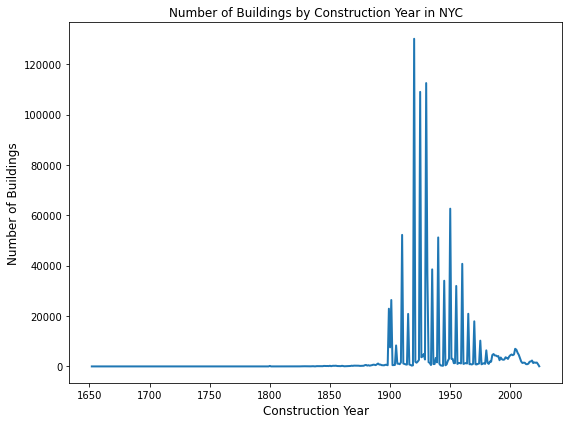

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of number of buildings by 'CNSTRCT_YR'
ax.plot(year_df['count'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

In [66]:
# calculating the cumulative sum of buildings by 'CNSTRCT_YR'
year_df['cumsum'] = year_df['count'].cumsum()

# previewing first five rows
year_df.head()

,count,cumsum
CNSTRCT_YR,,
1652,1,1
1661,2,3
1680,1,4
1690,1,5
1694,1,6


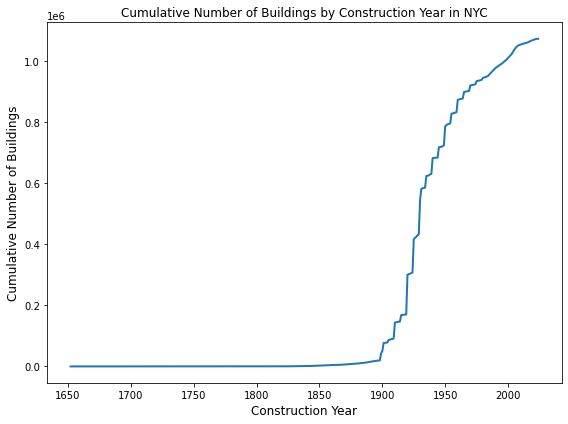

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(year_df['cumsum'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

## 5.2 Identify Oldest Building in Dataset

In [68]:
# sorting by the 'CNSTRCT_YR' in ascending order and 
# dropping records that don't have a building name (i.e. NAME)

(building_df
 .sort_values(by='CNSTRCT_YR')
 .dropna(subset=['NAME'])
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
956233,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
710890,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.12,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
52886,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.64,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
521973,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.26,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}
504175,MULTIPOLYGON (((-74.01121069434295 40.70334382...,Fraunces Tavern,1078965,1719.0,01/28/2020 12:00:00 AM,Constructed,299639,47.83,2100,7.0,0,0,1000070035,1000070035,Photogramm,{4B8DF813-9EAD-402A-81D9-58ECCB4ED502}


In [69]:
# identifying the oldest building with a building name in this dataset and
oldest = (
    building_df
    .sort_values(by='CNSTRCT_YR')
    .dropna(subset=['NAME'])
    .head(1)
)

oldest

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
956233,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}


### We will use the Pieter Claesen Wyckoff House as the oldest building in this dataset.

Screenshot of Pieter Claesen Wyckoff House from Wikipedia:

https://en.wikipedia.org/wiki/Wyckoff_House

![Pieter-Claesen-Wyckoff-House](images/Pieter-Claesen-Wyckoff-House.png)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace incorrect values with the median, and detect outliers with box plots. This step is crucial if you are interested in modeling or predicting future values. In Part III, we will focus on data visualization.